In [33]:
using LsqFit, Plots, Random
pgfplots(size=(400,400))

Plots.PGFPlotsBackend()

# Example 1

Set a random seed for reproducibility

In [14]:
Random.seed!(123);

Define the model *f(x) = p1 * x + p2 * x^2*

In [15]:
function model(x, p)
    @. p[1]*x + p[2]*x^2
end

model (generic function with 1 method)

Define the values of the model parameters

In [16]:
p = [0.3, 0.7]

2-element Array{Float64,1}:
 0.3
 0.7

Simulate X data

In [17]:
xdata = rand(10).*10 .-3

10-element Array{Float64,1}:
  4.684476751965699  
  6.405150007151871  
  3.7395869456806734 
  0.954531123351086  
  0.13243955807518626
  3.625548164736534  
  2.860221243068029  
 -2.4786683683134343 
 -0.3136043145504903 
 -1.9112925865155845 

And calculate Y data, running X through the model, with parameters p and random noise

In [18]:
ydata = model(xdata, p) .+ randn(length(xdata))*4

10-element Array{Float64,1}:
 15.4089046141534   
 27.26419594623961  
  7.355290463128691 
  2.2330099183033347
  2.4216230036936395
 11.760892188056435 
  5.460139288005378 
  0.6175149453000306
 -2.8948779943892085
 -1.1165396855475844

Solve the model use the *curve_fit* function, which requires the model, the X and Y data and an initial guess for the two parameters *p* of the model

In [19]:
res = curve_fit(model, xdata, ydata, rand(2))

LsqFit.LsqFitResult{Float64,1}(8, [0.981618, 0.490724], [-0.0419421, -0.844387, 3.17808, -0.848912, -2.28301, -1.75162, 1.36205, -0.0357143, 2.6353, 1.03301], [4.68448 21.9443; 6.40515 41.0259; … ; -0.313604 0.0983477; -1.91129 3.65304], true, Float64[])

Plot the results, dashed line shows the fitted model and the solid line shows the true model

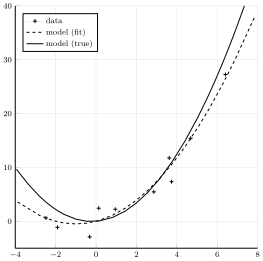

In [34]:
scatter(xdata, ydata, labels = "data", marker=:cross, legend=:topleft, xlims=(-4,8),ylims=(-5,40))
plot!(x->model(x, res.param), lt = :line, labels="model (fit)", c = :black, ls = :dash)
plot!(x->model(x, p), lt = :line, labels="model (true)", c = :black)

# Example 2

$$
f(x) = 2.0*exp(1.0*x) + 3.0
$$

In [35]:
function exp_model(x, p)
    @. p[1]*exp(p[2]*x)+p[3]
end
p_exp = [0.3, 0.7, 4.0]

3-element Array{Float64,1}:
 0.3
 0.7
 4.0

In [37]:
xdata = rand(13).*10 .-3

13-element Array{Float64,1}:
 -0.1893410489854248
  4.929310291631577 
 -0.9076983188970429
  6.181651310356722 
  3.1425477066563445
  5.026646943196736 
  2.556683009032697 
  6.407822702564648 
  1.7999983292375585
  4.902009526860665 
  0.562210850922185 
  6.009245960220277 
  2.292533237851204 

In [38]:
ydata = exp_model(xdata, p_exp) .+ randn(length(xdata)).*3

13-element Array{Float64,1}:
  4.46362754815317 
  8.222412624062638
  1.517347446215716
 25.95728753059946 
  9.148997407539435
 10.747154034990732
  4.763069703562083
 29.888254045072166
  9.653609950264002
 14.516361471636316
  3.761832110980565
 23.5782531131874  
 10.088467143778727

In [39]:
res = curve_fit(exp_model, xdata, ydata, rand(3))

LsqFit.LsqFitResult{Float64,1}(10, [0.074043, 0.906905, 5.47089], [1.06963, 3.71933, 3.98605, -0.33928, -2.39808, 1.79177, 1.46026, 0.316595, -3.80389, -2.73287, 1.83235, -0.876434, -4.02543], [0.84222 -0.0118074 1.0; 87.3931 31.8968 1.0; … ; 232.715 103.545 1.0; 7.99735 1.35752 1.0], true, Float64[])

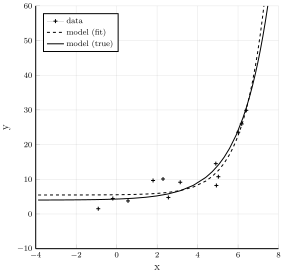

In [40]:
scatter(xdata, ydata, m = :cross, labels = "data", xlabel = "x", ylabel = "y", c = :black, xlims = (-4, 8), ylims = (-10,60))
plot!(x->exp_model(x, res.param), lt = :line, legend = :topleft, labels = "model (fit)", c = :black, ls = :dash)
plot!(x->exp_model(x, p_exp), lt = :line, legend = :topleft, labels = "model (true)", c = :black)